<a href="https://colab.research.google.com/github/Jawaaa/Proyek-ML/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Zahwa_Rizzi_Ani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [20]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/ML/data.csv'
df = pd.read_csv(dataset_path)

# Check the first few rows of the dataset
print(df.head())

# Check the shape of the dataset
print(df.shape)

# Check the data types
print(df.dtypes)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
(541909, 8)
InvoiceNo       object
StockCode       object
Description     object
Qua

<ipython-input-20-0338c3f31fab>:5: DtypeWarning: Columns (0,1,2,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

InvoiceNo      536909
StockCode      536909
Description    536921
Quantity       536909
InvoiceDate    536909
UnitPrice      536909
CustomerID     538114
Country        536909
dtype: int64
          Quantity    UnitPrice    CustomerID
count  5000.000000  5000.000000   3795.000000
mean      9.185800     3.792314  15906.281950
std     144.940788    13.211720   1732.068892
min   -9360.000000     0.000000  12431.000000
25%       1.000000     1.250000  14606.000000
50%       3.000000     2.510000  15862.000000
75%      10.000000     4.210000  17841.000000
max    2880.000000   607.490000  18239.000000


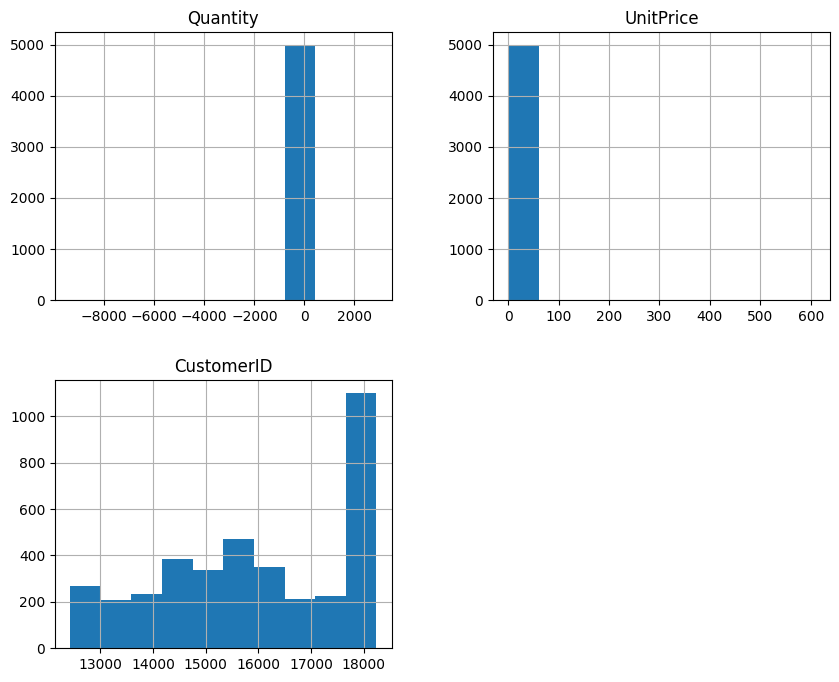

In [11]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics for numerical columns
print(df.describe())

# Distribution of numerical columns
df.hist(figsize=(10, 8))
plt.show()

# Correlation matrix
#corr_matrix = df.corr()
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [12]:
# Handle missing values (if any)
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()

# Select relevant columns for clustering
# For example, let's use 'Quantity' and 'UnitPrice'
X = df[['Quantity', 'UnitPrice']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

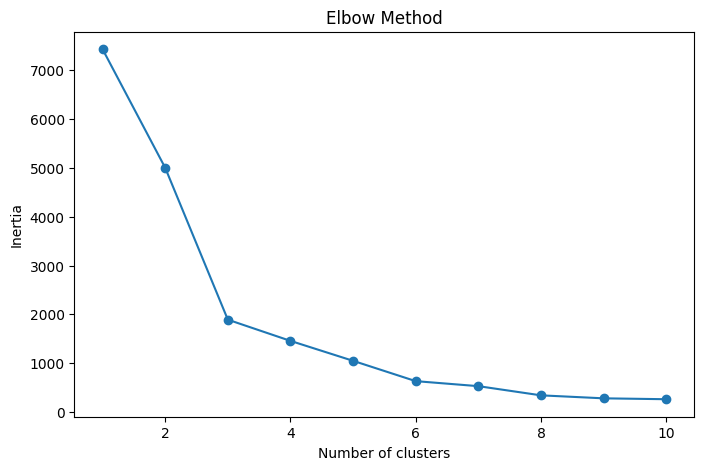

In [13]:
# Choose the number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [14]:
# Choose the optimal number of clusters based on the Elbow Method
optimal_k = 3  # Example, choose based on the plot

# Train the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.9844900171258107


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [15]:
# If needed, perform feature selection and repeat the clustering process
# Example: Select only 'Quantity' for clustering
X_selected = df[['Quantity']]
X_selected_scaled = scaler.fit_transform(X_selected)

# Train the KMeans model with selected features
kmeans_selected = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_selected.fit(X_selected_scaled)

# Add cluster labels to the original dataframe
df['Cluster_Selected'] = kmeans_selected.labels_

# Calculate Silhouette Score for selected features
silhouette_avg_selected = silhouette_score(X_selected_scaled, kmeans_selected.labels_)
print(f'Silhouette Score with Selected Features: {silhouette_avg_selected}')

Silhouette Score with Selected Features: 0.9903231248770762


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

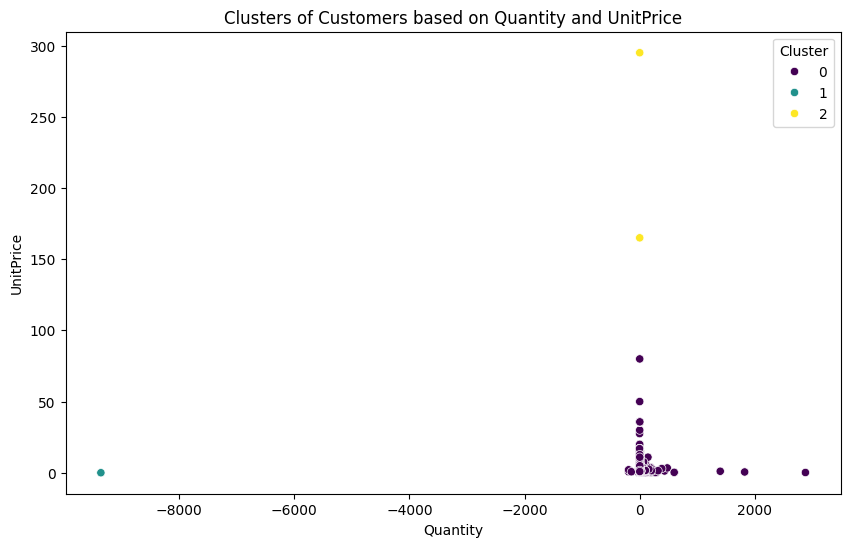

In [16]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Customers based on Quantity and UnitPrice')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [17]:
# Analyze the characteristics of each cluster
numeric_cols = df.select_dtypes(include=np.number).columns
cluster_analysis = df.groupby('Cluster')[numeric_cols].mean()
print(cluster_analysis)

            Quantity   UnitPrice    CustomerID  Cluster  Cluster_Selected
Cluster                                                                  
0          14.053057    3.079997  15884.893886      0.0          0.001616
1       -9360.000000    0.030000  15838.000000      1.0          1.000000
2           1.000000  230.000000  13425.000000      2.0          0.000000


Tulis hasil interpretasinya di sini.

**Cluster 0**
*   **Rata-rata Quantity:** 14.05
*   **Rata-rata Unit Price:** $3.08
*   **Rata-rata Customer ID:** 15,884.89
*   **Karakteristik:** Pelanggan reguler dengan jumlah pembelian normal dan harga wajar.
*   **Interpretasi:** Pelanggan dalam cluster ini memiliki pola pembelian yang stabil dengan jumlah barang yang cukup banyak dan harga produk yang relatif murah. Mereka merupakan pelanggan yang sering melakukan transaksi dengan jumlah yang cukup konsisten.

**Cluster 1**
*   **Rata-rata Quantity:** -9,360
*   **Rata-rata Unit Price:** $0.03
*   **Rata-rata Customer ID:** 15,838
*   **Karakteristik:** Pelanggan yang lebih sering melakukan pengembalian barang atau transaksi tidak valid.
*   **Interpretasi:** Cluster ini menunjukkan adanya transaksi negatif dalam jumlah besar, yang mengindikasikan pengembalian produk dalam skala besar. Harga unit yang sangat rendah juga menunjukkan bahwa transaksi ini kemungkinan besar merupakan koreksi atau refund terhadap barang yang sebelumnya telah dibeli.

**Cluster 2**
*   **Rata-rata Quantity:** 1.00
*   **Rata-rata Unit Price:** $230.00
*   **Rata-rata Customer ID:** 13,425
*   **Karakteristik:** Pelanggan yang membeli produk mahal dalam jumlah kecil.
*   **Interpretasi:** Pelanggan dalam cluster ini cenderung membeli produk dengan harga yang sangat tinggi tetapi dalam jumlah yang sangat sedikit. Hal ini menunjukkan bahwa mereka lebih selektif dalam memilih produk dan kemungkinan hanya membeli barang premium atau eksklusif.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [13]:
from google.colab import files

# Simpan data ke CSV
df.to_csv('clustered_data.csv', index=False)

# Unduh file
files.download('clustered_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>